#강화학습  
5가지 환경 중 하나의 환경을 선택 하신 후  
**MountainCar**  
Acrobot  
LunarLander  
BipedalWalker  
Breakout  
조원들 중 어느 방식을 적용할 지 토론하세요.

**Value-Based**: 병준

Policy-Based: 상협

Model-Based: 지윤

또는 방식을 정한 후 조원들이 서로 다른 환경을 선택하셔도 됩니다.

In [ ]:
import numpy as np
import random
import gym

# 환경 설정
env = gym.make('MountainCar-v0')

# 매개변수 설정
learning_rate = 0.2
discount_factor = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
total_episodes = 1000

# 가중치 초기화
state_space_size = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
state_space_size = np.round(state_space_size, 0).astype(int) + 1
Q = np.random.uniform(low=-1, high=1, size=(state_space_size[0], state_space_size[1], env.action_space.n))

# 상태 변환 함수
def discretize_state(state):
    state_adj = (state - env.observation_space.low) * np.array([10, 100])
    state_adj = np.round(state_adj, 0).astype(int)
    return state_adj

# 에이전트의 행동 선택 함수
def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # 무작위 행동
    else:
        return np.argmax(Q[state[0], state[1], :])  # 최적의 행동

# Q-학습 알고리즘
for episode in range(total_episodes):
    state = discretize_state(env.reset())
    done = False

    while not done:
        action = choose_action(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        next_state = discretize_state(next_state)

        # Q-테이블 업데이트
        Q[state[0], state[1], action] = Q[state[0], state[1], action] + \
            learning_rate * (reward + discount_factor * np.max(Q[next_state[0], next_state[1], :]) - Q[state[0], state[1], action])

        state = next_state

    # Epsilon 값을 줄임
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

# 학습된 Q-테이블 출력
print("학습된 Q-테이블:")
print(Q)

학습된 Q-테이블:
[[[-3.18276698e-01  4.58425871e-01 -4.71203039e-01]
  [ 2.00361555e-01  8.53766678e-01  6.79897109e-01]
  [-1.31161687e+01 -1.12617086e+01 -1.32060592e+01]
  [-2.60761888e+01 -2.61744748e+01 -2.62491689e+01]
  [-2.65824104e+01 -2.66495260e+01 -2.65673510e+01]
  [-2.70952793e+01 -2.70716481e+01 -2.71894676e+01]
  [-2.76437966e+01 -2.76942169e+01 -2.77340051e+01]
  [-2.76547385e+01 -2.77966239e+01 -2.77109021e+01]
  [-2.73462602e+01 -2.72510928e+01 -2.69203128e+01]
  [-2.38671516e+01 -2.38443546e+01 -2.37967926e+01]
  [ 8.28637098e-01  9.90896120e-01  6.03941288e-02]
  [-1.01553968e-02 -3.98074997e-01  1.79961795e-02]
  [-3.22391724e-01  5.22773826e-01 -5.20172920e-01]
  [-7.39803117e-01 -7.09139369e-01 -1.44225721e-01]
  [ 5.82877911e-01 -2.01006316e-01 -6.95961428e-01]]

 [[-3.96963125e-01 -3.27051861e-01 -1.62567180e-01]
  [-1.73482081e-01 -9.35205650e-01 -1.88336828e-01]
  [-1.78943306e+01 -1.71539306e+01 -1.59906377e+01]
  [-2.71459649e+01 -2.69275405e+01 -2.70619934e+01]

##total_reward, epsilon 시각화1

학습된 Q-테이블:
[[[-8.79034512e-01 -3.64347055e-01 -8.92292394e-01]
  [ 4.81446017e-02 -3.08698884e-01 -9.11351052e-01]
  [ 6.09878306e-01 -7.65759777e-02  2.76809626e-01]
  [-1.22923108e+01 -1.22525001e+01 -8.01651957e+00]
  [-1.56719757e+01 -1.42344554e+01 -1.56547965e+01]
  [-1.56459966e+01 -1.58763525e+01 -1.49008900e+01]
  [-1.64633819e+01 -1.64412979e+01 -1.64590711e+01]
  [-1.66553615e+01 -1.62947401e+01 -1.65578127e+01]
  [-1.63471601e+01 -1.62354153e+01 -1.63491329e+01]
  [-9.77030171e+00 -8.91294964e+00 -9.49310032e+00]
  [-8.63014719e-01  3.72489797e-01  4.23902310e-01]
  [ 1.62788238e-01  4.79731691e-01 -3.70126643e-01]
  [ 1.76585101e-01  4.91597305e-01 -8.08443989e-01]
  [-3.44448498e-01 -2.42381007e-01  9.71378906e-01]
  [-7.45252413e-01  9.34934349e-01 -7.18033272e-01]]

 [[-8.50093995e-01  3.44859986e-02 -1.32751557e-01]
  [ 9.91692557e-01  3.04390814e-01  1.45476524e-01]
  [-1.05153978e+00 -4.32436998e-01 -7.23733125e-01]
  [-1.52022647e+01 -1.47050231e+01 -1.57139041e+01]

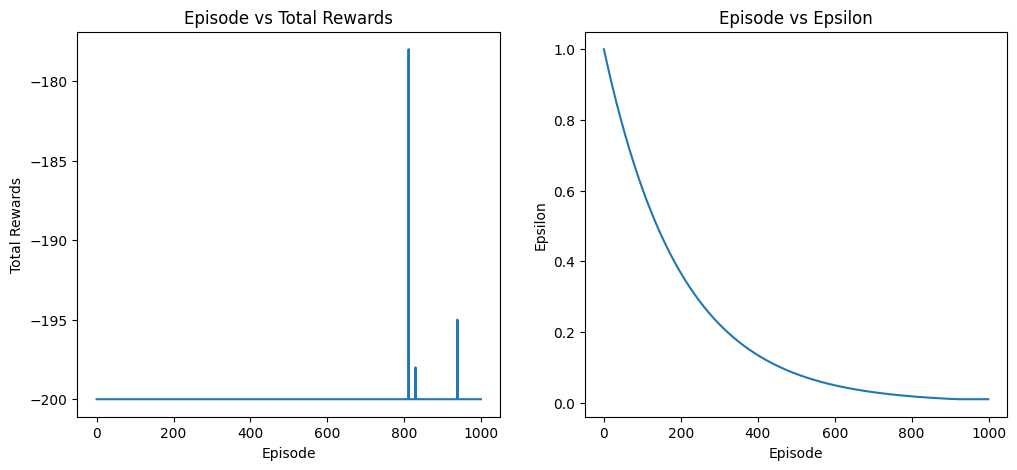

In [ ]:
import numpy as np
import random
import gym
import matplotlib.pyplot as plt

# 환경 설정
env = gym.make('MountainCar-v0')

# 매개변수 설정
learning_rate = 0.8
discount_factor = 0.95
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
total_episodes = 1000

# 가중치 초기화
state_space_size = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
state_space_size = np.round(state_space_size, 0).astype(int) + 1
Q = np.random.uniform(low=-1, high=1, size=(state_space_size[0], state_space_size[1], env.action_space.n))

# 보상과 epsilon 변화를 추적하기 위한 리스트
rewards = []
epsilons = []

# 상태 변환 함수
def discretize_state(state):
    state_adj = (state - env.observation_space.low) * np.array([10, 100])
    state_adj = np.round(state_adj, 0).astype(int)
    return state_adj

# 에이전트의 행동 선택 함수
def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # 무작위 행동
    else:
        return np.argmax(Q[state[0], state[1], :])  # 최적의 행동

# Q-학습 알고리즘
for episode in range(total_episodes):
    state = discretize_state(env.reset())
    done = False
    total_reward = 0

    while not done:
        action = choose_action(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        next_state = discretize_state(next_state)
        total_reward += reward

        # Q-테이블 업데이트
        Q[state[0], state[1], action] = Q[state[0], state[1], action] + \
            learning_rate * (reward + discount_factor * np.max(Q[next_state[0], next_state[1], :]) - Q[state[0], state[1], action])

        state = next_state

    # 보상과 epsilon 추가
    rewards.append(total_reward)
    epsilons.append(epsilon)

    # Epsilon 값을 줄임
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

# 학습된 Q-테이블 출력
print("학습된 Q-테이블:")
print(Q)

# 보상과 epsilon 변화 시각화
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(rewards)
plt.title('Episode vs Total Rewards')
plt.xlabel('Episode')
plt.ylabel('Total Rewards')

plt.subplot(122)
plt.plot(epsilons)
plt.title('Episode vs Epsilon')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()

##total_reward, epsilon 시각화2(매개변수 변경)

학습된 Q-테이블:
[[[ 7.03373736e-01 -7.77731765e-01  9.07843566e-01]
  [-3.28569495e-01  5.64219724e-01 -5.95326939e-01]
  [-1.43226800e+01 -1.40791408e+01 -1.58142018e+01]
  [-2.67777679e+01 -2.61113628e+01 -2.60107548e+01]
  [-2.91251666e+01 -2.90387786e+01 -2.91009330e+01]
  [-2.97302785e+01 -2.96771678e+01 -2.98280777e+01]
  [-2.93697569e+01 -2.91929251e+01 -2.89536179e+01]
  [-3.07044662e+01 -3.06381765e+01 -3.05929483e+01]
  [-2.99462319e+01 -3.00597362e+01 -3.01123353e+01]
  [-2.48313490e+01 -2.49167576e+01 -2.49108223e+01]
  [-5.06378343e-01 -3.93564921e-01 -1.00692342e-01]
  [-1.85804090e-01  4.99518412e-01 -2.41032943e-01]
  [-6.83678572e-01  9.16746955e-01  8.96023612e-01]
  [ 3.23222027e-01 -6.10143338e-01  8.98505171e-01]
  [-9.50055434e-01  6.91591982e-01 -4.01877336e-01]]

 [[ 6.54024260e-01 -8.87439486e-01  8.40580808e-01]
  [-4.15776625e-01  5.19457628e-01 -5.44996220e-02]
  [-1.73300221e+01 -1.60170493e+01 -1.48707709e+01]
  [-2.85277237e+01 -2.84529468e+01 -2.85762638e+01]

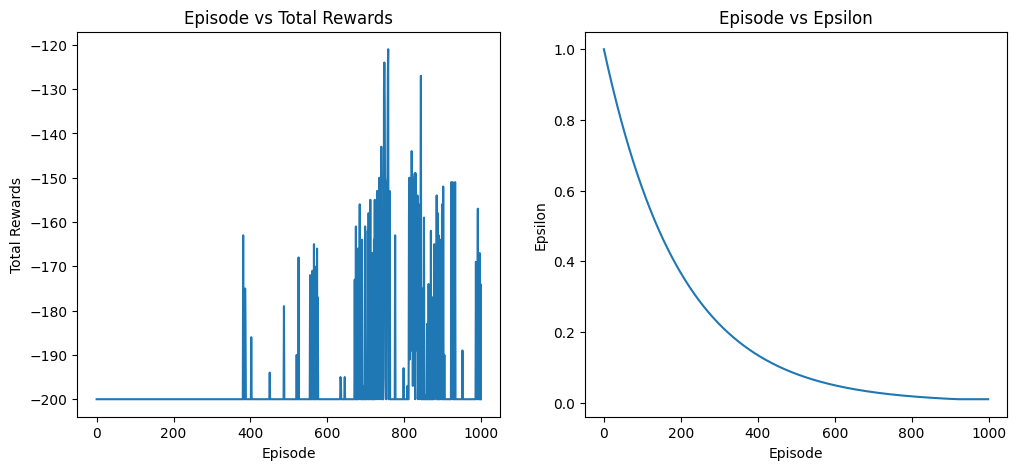

In [ ]:
import numpy as np
import random
import gym
import matplotlib.pyplot as plt

# 환경 설정
env = gym.make('MountainCar-v0')

# 매개변수 설정
learning_rate = 0.2
discount_factor = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
total_episodes = 1000

# 가중치 초기화
state_space_size = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
state_space_size = np.round(state_space_size, 0).astype(int) + 1
Q = np.random.uniform(low=-1, high=1, size=(state_space_size[0], state_space_size[1], env.action_space.n))

# 보상과 epsilon 변화를 추적하기 위한 리스트
rewards = []
epsilons = []

# 상태 변환 함수
def discretize_state(state):
    state_adj = (state - env.observation_space.low) * np.array([10, 100])
    state_adj = np.round(state_adj, 0).astype(int)
    return state_adj

# 에이전트의 행동 선택 함수
def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # 무작위 행동
    else:
        return np.argmax(Q[state[0], state[1], :])  # 최적의 행동

# Q-학습 알고리즘
for episode in range(total_episodes):
    state = discretize_state(env.reset())
    done = False
    total_reward = 0

    while not done:
        action = choose_action(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        next_state = discretize_state(next_state)
        total_reward += reward

        # Q-테이블 업데이트
        Q[state[0], state[1], action] = Q[state[0], state[1], action] + \
            learning_rate * (reward + discount_factor * np.max(Q[next_state[0], next_state[1], :]) - Q[state[0], state[1], action])

        state = next_state

    # 보상과 epsilon 추가
    rewards.append(total_reward)
    epsilons.append(epsilon)

    # Epsilon 값을 줄임
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

# 학습된 Q-테이블 출력
print("학습된 Q-테이블:")
print(Q)

# 보상과 epsilon 변화 시각화
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(rewards)
plt.title('Episode vs Total Rewards')
plt.xlabel('Episode')
plt.ylabel('Total Rewards')

plt.subplot(122)
plt.plot(epsilons)
plt.title('Episode vs Epsilon')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()

##그냥 학습

In [ ]:
import gym

# 환경 생성
env = gym.make('MountainCar-v0')

# 첫 번째 에피소드 시작
state = env.reset()
done = False

while not done:
    action = env.action_space.sample() # 무작위 행동 선택
    next_state, reward, done, info = env.step(action) # 행동 실행
    print(next_state,reward,done, info) # 상태 출력

env.close()  # 환경 종료

[-4.0265238e-01  1.1347079e-04] -1.0 False {}
[-0.40442625 -0.00177385] -1.0 False {}
[-0.407075   -0.00264873] -1.0 False {}
[-0.41157994 -0.00450497] -1.0 False {}
[-0.41690934 -0.00532938] -1.0 False {}
[-0.4220253  -0.00511596] -1.0 False {}
[-0.42689133 -0.00486603] -1.0 False {}
[-0.4314725 -0.0045812] -1.0 False {}
[-0.4357359  -0.00426339] -1.0 False {}
[-0.43965065 -0.00391475] -1.0 False {}
[-0.4441884  -0.00453773] -1.0 False {}
[-0.44831607 -0.00412769] -1.0 False {}
[-0.4540036  -0.00568752] -1.0 False {}
[-0.4592093 -0.0052057] -1.0 False {}
[-0.46489492 -0.00568563] -1.0 False {}
[-0.47201857 -0.00712363] -1.0 False {}
[-0.4805275  -0.00850894] -1.0 False {}
[-0.4903586  -0.00983108] -1.0 False {}
[-0.50143856 -0.01107997] -1.0 False {}
[-0.5126846  -0.01124605] -1.0 False {}
[-0.5250125  -0.01232789] -1.0 False {}
[-0.5383298  -0.01331729] -1.0 False {}
[-0.55053663 -0.01220684] -1.0 False {}
[-0.5625416  -0.01200502] -1.0 False {}
[-0.57325524 -0.01071362] -1.0 False {

##Q-테이블 활용1

In [ ]:
import numpy as np
import random
import gym

# 환경 설정
env = gym.make('MountainCar-v0')

# 매개변수 설정
learning_rate = 0.2
discount_factor = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
total_episodes = 1000

# 가중치 초기화
state_space_size = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
state_space_size = np.round(state_space_size, 0).astype(int) + 1
Q = np.random.uniform(low=-1, high=1, size=(state_space_size[0], state_space_size[1], env.action_space.n))

# 상태 변환 함수
def discretize_state(state):
    state_adj = (state - env.observation_space.low) * np.array([10, 100])
    state_adj = np.round(state_adj, 0).astype(int)
    return state_adj

# 에이전트의 행동 선택 함수
def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # 무작위 행동
    else:
        return np.argmax(Q[state[0], state[1], :])  # 최적의 행동

# Q-학습 알고리즘
for episode in range(total_episodes):
    state = discretize_state(env.reset())
    done = False

    while not done:
        action = choose_action(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        next_state = discretize_state(next_state)

        # Q-테이블 업데이트
        Q[state[0], state[1], action] = Q[state[0], state[1], action] + \
            learning_rate * (reward + discount_factor * np.max(Q[next_state[0], next_state[1], :]) - Q[state[0], state[1], action])

        state = next_state

    # Epsilon 값을 줄임
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

# 학습된 Q-테이블을 사용한 에피소드
state = discretize_state(env.reset())
done = False

while not done:
    # 학습된 Q-테이블을 사용하여 행동 선택
    action = np.argmax(Q[state[0], state[1], :])

    # 행동 실행
    next_state, reward, done, info = env.step(action)
    next_state = discretize_state(next_state)

    # 상태 출력
    print(next_state, reward, done, info)

    # 현재 상태 업데이트
    state = next_state

env.close()  # 환경 종료

[7 7] -1.0 False {}
[7 7] -1.0 False {}
[7 7] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[6 6] -1.0 False {}
[6 6] -1.0 False {}
[6 6] -1.0 False {}
[6 6] -1.0 False {}
[6 6] -1.0 False {}
[6 5] -1.0 False {}
[6 5] -1.0 False {}
[5 5] -1.0 False {}
[5 5] -1.0 False {}
[5 5] -1.0 False {}
[5 5] -1.0 False {}
[5 6] -1.0 False {}
[5 6] -1.0 False {}
[5 6] -1.0 False {}
[4 6] -1.0 False {}
[4 6] -1.0 False {}
[4 6] -1.0 False {}
[4 6] -1.0 False {}
[4 7] -1.0 False {}
[4 7] -1.0 False {}
[4 7] -1.0 False {}
[4 7] -1.0 False {}
[4 8] -1.0 False {}
[4 8] -1.0 False {}
[4 8] -1.0 False {}
[5 8] -1.0 False {}
[5 8] -1.0 False {}
[5 8] -1.0 False {}
[5 9] -1.0 False {}
[5 9] -1.0 False {}
[5 9] -1.0 False {}
[6 9] -1.0 False {}
[6 9] -1.0 False {}
[6 9] -1.0 False {}
[ 6 10] -1.0 False {}
[ 7 10] -1.0 False {}
[ 7 10] -1.0 False {}
[ 7 10] -1.0 False {}
[ 7 10] -1.0 False {}
[ 8 10] -1

##Q-테이블 활용2(lr, epoch 변경)

In [ ]:
import numpy as np
import random
import gym

# 환경 설정
env = gym.make('MountainCar-v0')

# 매개변수 설정
learning_rate = 0.1
discount_factor = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
total_episodes = 10000

# 가중치 초기화
state_space_size = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
state_space_size = np.round(state_space_size, 0).astype(int) + 1
Q = np.random.uniform(low=-1, high=1, size=(state_space_size[0], state_space_size[1], env.action_space.n))

# 상태 변환 함수
def discretize_state(state):
    state_adj = (state - env.observation_space.low) * np.array([10, 100])
    state_adj = np.round(state_adj, 0).astype(int)
    return state_adj

# 에이전트의 행동 선택 함수
def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # 무작위 행동
    else:
        return np.argmax(Q[state[0], state[1], :])  # 최적의 행동

# Q-학습 알고리즘
for episode in range(total_episodes):
    state = discretize_state(env.reset())
    done = False

    while not done:
        action = choose_action(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        next_state = discretize_state(next_state)

        # Q-테이블 업데이트
        Q[state[0], state[1], action] = Q[state[0], state[1], action] + \
            learning_rate * (reward + discount_factor * np.max(Q[next_state[0], next_state[1], :]) - Q[state[0], state[1], action])

        state = next_state

    # Epsilon 값을 줄임
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

# 학습된 Q-테이블을 사용한 에피소드
state = discretize_state(env.reset())
done = False

while not done:
    # 학습된 Q-테이블을 사용하여 행동 선택
    action = np.argmax(Q[state[0], state[1], :])

    # 행동 실행
    next_state, reward, done, info = env.step(action)
    next_state = discretize_state(next_state)

    # 상태 출력
    print(next_state, reward, done, info)

    # 현재 상태 업데이트
    state = next_state

env.close()  # 환경 종료

[8 7] -1.0 False {}
[7 7] -1.0 False {}
[7 7] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[6 5] -1.0 False {}
[6 5] -1.0 False {}
[6 5] -1.0 False {}
[6 5] -1.0 False {}
[6 5] -1.0 False {}
[6 5] -1.0 False {}
[5 5] -1.0 False {}
[5 5] -1.0 False {}
[5 5] -1.0 False {}
[5 5] -1.0 False {}
[5 5] -1.0 False {}
[4 5] -1.0 False {}
[4 5] -1.0 False {}
[4 6] -1.0 False {}
[4 6] -1.0 False {}
[4 6] -1.0 False {}
[4 6] -1.0 False {}
[4 6] -1.0 False {}
[4 6] -1.0 False {}
[4 6] -1.0 False {}
[3 6] -1.0 False {}
[3 6] -1.0 False {}
[3 6] -1.0 False {}
[3 7] -1.0 False {}
[3 7] -1.0 False {}
[3 7] -1.0 False {}
[3 7] -1.0 False {}
[3 7] -1.0 False {}
[3 8] -1.0 False {}
[4 8] -1.0 False {}
[4 8] -1.0 False {}
[4 8] -1.0 False {}
[4 8] -1.0 False {}
[4 9] -1.0 False {}
[4 9] -1.0 False {}
[4 9] -1.0 False {}
[5 9] -1.0 False {}
[ 5 10] -1.0 False {}
[ 5 10] -1.0 False

'TimeLimit.truncated': False인데 done이 True로 출력되어 정상적으로 목표에 도달했음을 확인했다.

##Q-테이블 활용3(next_state 아닌 state 출력)

In [ ]:
import numpy as np
import random
import gym

# 환경 설정
env = gym.make('MountainCar-v0')

# 매개변수 설정
learning_rate = 0.1
discount_factor = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
total_episodes = 10000

# 가중치 초기화
state_space_size = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
state_space_size = np.round(state_space_size, 0).astype(int) + 1
Q = np.random.uniform(low=-1, high=1, size=(state_space_size[0], state_space_size[1], env.action_space.n))

# 상태 변환 함수
def discretize_state(state):
    state_adj = (state - env.observation_space.low) * np.array([10, 100])
    state_adj = np.round(state_adj, 0).astype(int)
    return state_adj

# 에이전트의 행동 선택 함수
def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # 무작위 행동
    else:
        return np.argmax(Q[state[0], state[1], :])  # 최적의 행동

# Q-학습 알고리즘
for episode in range(total_episodes):
    state = discretize_state(env.reset())
    done = False

    while not done:
        action = choose_action(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        next_state = discretize_state(next_state)

        # Q-테이블 업데이트
        Q[state[0], state[1], action] = Q[state[0], state[1], action] + \
            learning_rate * (reward + discount_factor * np.max(Q[next_state[0], next_state[1], :]) - Q[state[0], state[1], action])

        state = next_state

    # Epsilon 값을 줄임
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

# 학습된 Q-테이블을 사용한 에피소드
state = discretize_state(env.reset())
done = False

while not done:
    # 학습된 Q-테이블을 사용하여 행동 선택
    action = np.argmax(Q[state[0], state[1], :])

    # 행동 실행
    state, reward, done, info = env.step(action)
    state = discretize_state(state)

    # 상태 출력
    print(state, reward, done, info)

env.close()  # 환경 종료

[7 7] -1.0 False {}
[7 7] -1.0 False {}
[7 7] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[7 6] -1.0 False {}
[6 6] -1.0 False {}
[6 6] -1.0 False {}
[6 6] -1.0 False {}
[6 6] -1.0 False {}
[6 6] -1.0 False {}
[6 6] -1.0 False {}
[6 6] -1.0 False {}
[6 6] -1.0 False {}
[6 6] -1.0 False {}
[5 6] -1.0 False {}
[5 6] -1.0 False {}
[5 6] -1.0 False {}
[5 6] -1.0 False {}
[5 7] -1.0 False {}
[5 7] -1.0 False {}
[5 7] -1.0 False {}
[5 7] -1.0 False {}
[5 7] -1.0 False {}
[5 8] -1.0 False {}
[5 8] -1.0 False {}
[6 8] -1.0 False {}
[6 8] -1.0 False {}
[6 8] -1.0 False {}
[6 9] -1.0 False {}
[6 9] -1.0 False {}
[6 9] -1.0 False {}
[6 9] -1.0 False {}
[7 9] -1.0 False {}
[7 9] -1.0 False {}
[7 9] -1.0 False {}
[7 9] -1.0 False {}
[7 9] -1.0 False {}
[8 9] -1.0 False {}
[8 9] -1.0 False {}
[8 9] -1.0 False {}


마찬가지로 'TimeLimit.truncated': False인데 done이 True로 출력되어 정상적으로 목표에 도달했음을 확인했다.

##Q-테이블 활용4(상태 변환 함수 제거)

In [6]:
import numpy as np
import random
import gym

# 환경 설정
env = gym.make('MountainCar-v0')

# 매개변수 설정
learning_rate = 0.1
discount_factor = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
total_episodes = 10000

# 가중치 초기화
state_space_size = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
state_space_size = np.round(state_space_size, 0).astype(int) + 1
Q = np.random.uniform(low=-1, high=1, size=(state_space_size[0], state_space_size[1], env.action_space.n))

# 에이전트의 행동 선택 함수
def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # 무작위 행동
    else:
        return np.argmax(Q[int(state[0]), int(state[1]), :])  # 최적의 행동

# Q-학습 알고리즘
for episode in range(total_episodes):
    state = env.reset()
    done = False

    while not done:
        action = choose_action(state, epsilon)
        next_state, reward, done, _ = env.step(action)

        # Q-테이블 업데이트
        current_q = Q[int(state[0]), int(state[1]), action]
        max_future_q = np.max(Q[int(next_state[0]), int(next_state[1]), :])
        new_q = current_q + learning_rate * (reward + discount_factor * max_future_q - current_q)
        Q[int(state[0]), int(state[1]), action] = new_q

        state = next_state

    # Epsilon 값을 줄임
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

# 학습된 Q-테이블을 사용한 에피소드
state = env.reset()
done = False

while not done:
    # 학습된 Q-테이블을 사용하여 행동 선택
    action = np.argmax(Q[int(state[0]), int(state[1]), :])

    # 행동 실행
    state, reward, done, info = env.step(action)

    # 상태 출력
    print(state, reward, done, info)

env.close()  # 환경 종료

[-0.46316555 -0.00146155] -1.0 False {}
[-0.46607786 -0.00291232] -1.0 False {}
[-0.47041947 -0.00434159] -1.0 False {}
[-0.4761582  -0.00573874] -1.0 False {}
[-0.48325154 -0.00709335] -1.0 False {}
[-0.49164677 -0.00839521] -1.0 False {}
[-0.50128126 -0.00963449] -1.0 False {}
[-0.512083   -0.01080174] -1.0 False {}
[-0.5239711  -0.01188809] -1.0 False {}
[-0.53685635 -0.0128853 ] -1.0 False {}
[-0.55064225 -0.0137859 ] -1.0 False {}
[-0.56522554 -0.01458329] -1.0 False {}
[-0.58049744 -0.0152719 ] -1.0 False {}
[-0.5963447  -0.01584723] -1.0 False {}
[-0.61265063 -0.01630596] -1.0 False {}
[-0.62929666 -0.01664598] -1.0 False {}
[-0.6461631  -0.01686647] -1.0 False {}
[-0.66313094 -0.01696781] -1.0 False {}
[-0.68008256 -0.01695161] -1.0 False {}
[-0.69690317 -0.01682062] -1.0 False {}
[-0.7134818  -0.01657861] -1.0 False {}
[-0.729712   -0.01623027] -1.0 False {}
[-0.7454931  -0.01578106] -1.0 False {}
[-0.76073015 -0.01523707] -1.0 False {}
[-0.775335   -0.01460484] -1.0 False {}


상태 변환 함수 제거 시 목표 도달에 실패한다.